Imports

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
import tensorflow as tf

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasClassifier


Load the dataset

In [3]:
df = loadtxt('data_oversampled.csv',skiprows = 1, delimiter=',')

In [4]:
df

array([[  1. ,  85. ,  26.6,  31. ,   0. ],
       [  1. ,  89. ,  28.1,  21. ,   0. ],
       [  5. , 116. ,  25.6,  30. ,   0. ],
       ...,
       [  1. , 122. ,  35.1,  30. ,   1. ],
       [  7. , 114. ,  32.8,  42. ,   1. ],
       [  5. , 144. ,  32. ,  58. ,   1. ]])

Splitting the dataset

In [5]:
# split into input (X) and output (y) variables
x = df[:,0:4]
y = df[:,4]

Standardisation

In [6]:
#Train, Test and Split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

Build the Keras Model

In [52]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers
# Multiples of 4, smaller decrements
# define the keras model
model = Sequential()

model.add(Dense(16, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()


Epoch 1/150
42/42 [==============================] - 1s 6ms/step - loss: 0.6833 - accuracy: 0.5410 - val_loss: 0.6839 - val_accuracy: 0.5955
Epoch 2/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.5760 - val_loss: 0.6744 - val_accuracy: 0.6818
Epoch 3/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.6003 - val_loss: 0.6627 - val_accuracy: 0.6864
Epoch 4/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.6140 - val_loss: 0.6470 - val_accuracy: 0.7091
Epoch 5/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.6398 - val_loss: 0.6289 - val_accuracy: 0.7318
Epoch 6/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.6444 - val_loss: 0.6073 - val_accuracy: 0.7091
Epoch 7/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.6733 - val_loss: 0.5901 - val_accuracy: 0.7091
Epoch 8/150
4

Epoch 59/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5080 - accuracy: 0.7781 - val_loss: 0.4964 - val_accuracy: 0.7545
Epoch 60/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4859 - accuracy: 0.7842 - val_loss: 0.4965 - val_accuracy: 0.7455
Epoch 61/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.7614 - val_loss: 0.4958 - val_accuracy: 0.7591
Epoch 62/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.7766 - val_loss: 0.4966 - val_accuracy: 0.7545
Epoch 63/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7857 - val_loss: 0.4968 - val_accuracy: 0.7591
Epoch 64/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4997 - accuracy: 0.7948 - val_loss: 0.4963 - val_accuracy: 0.7591
Epoch 65/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.7964 - val_loss: 0.4959 - val_accuracy: 0.7591
Epoch 

42/42 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.7979 - val_loss: 0.4876 - val_accuracy: 0.7455
Epoch 117/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.7781 - val_loss: 0.4883 - val_accuracy: 0.7409
Epoch 118/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4882 - accuracy: 0.7948 - val_loss: 0.4884 - val_accuracy: 0.7636
Epoch 119/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.7796 - val_loss: 0.4900 - val_accuracy: 0.7682
Epoch 120/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.7857 - val_loss: 0.4907 - val_accuracy: 0.7727
Epoch 121/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.7857 - val_loss: 0.4913 - val_accuracy: 0.7545
Epoch 122/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7857 - val_loss: 0.4900 - val_accuracy: 0.7591
Epoch 123/150

In [53]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))


21/21 [==============================] - 0s 947us/step - loss: 0.4235 - accuracy: 0.8176
Training Accuracy: 81.76
7/7 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.7636
Validation Accuracy: 76.36


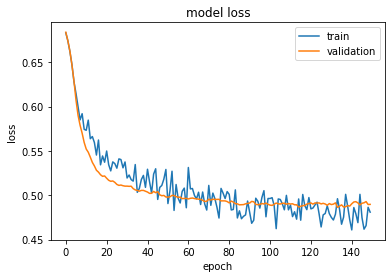

In [54]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [70]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers
# Multiples of 4, larger decrements

# define the keras model
model = Sequential()

model.add(Dense(32, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()


Epoch 1/150
42/42 [==============================] - 1s 6ms/step - loss: 0.6662 - accuracy: 0.5805 - val_loss: 0.6452 - val_accuracy: 0.7000
Epoch 2/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.6079 - val_loss: 0.6130 - val_accuracy: 0.6909
Epoch 3/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5990 - accuracy: 0.6809 - val_loss: 0.5820 - val_accuracy: 0.7045
Epoch 4/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.7006 - val_loss: 0.5621 - val_accuracy: 0.7091
Epoch 5/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.7143 - val_loss: 0.5499 - val_accuracy: 0.7136
Epoch 6/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5507 - accuracy: 0.7310 - val_loss: 0.5401 - val_accuracy: 0.7091
Epoch 7/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.7325 - val_loss: 0.5343 - val_accuracy: 0.7136
Epoch 8/150
4

Epoch 59/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.8116 - val_loss: 0.4949 - val_accuracy: 0.7545
Epoch 60/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.8100 - val_loss: 0.4937 - val_accuracy: 0.7545
Epoch 61/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.7812 - val_loss: 0.4930 - val_accuracy: 0.7591
Epoch 62/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7933 - val_loss: 0.4932 - val_accuracy: 0.7545
Epoch 63/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.8055 - val_loss: 0.4953 - val_accuracy: 0.7500
Epoch 64/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.8040 - val_loss: 0.4910 - val_accuracy: 0.7545
Epoch 65/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.7933 - val_loss: 0.4928 - val_accuracy: 0.7455
Epoch 

42/42 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7948 - val_loss: 0.4841 - val_accuracy: 0.7727
Epoch 117/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4863 - accuracy: 0.7903 - val_loss: 0.4853 - val_accuracy: 0.7636
Epoch 118/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.8055 - val_loss: 0.4896 - val_accuracy: 0.7682
Epoch 119/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4498 - accuracy: 0.8146 - val_loss: 0.4906 - val_accuracy: 0.7727
Epoch 120/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.7964 - val_loss: 0.4911 - val_accuracy: 0.7591
Epoch 121/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.8116 - val_loss: 0.4921 - val_accuracy: 0.7591
Epoch 122/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.8009 - val_loss: 0.4875 - val_accuracy: 0.7773
Epoch 123/150

In [71]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.8359
Training Accuracy: 83.59
7/7 [==============================] - 0s 1ms/step - loss: 0.4779 - accuracy: 0.7682
Validation Accuracy: 76.82


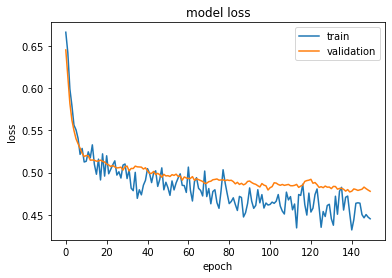

In [72]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [152]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers
# Multiples of 4, larger decrements, Hidden is 2/3 of Input

# define the keras model
model = Sequential()

model.add(Dense(24, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.3))
model.add(Dense(12, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()


Epoch 1/150
42/42 [==============================] - 1s 5ms/step - loss: 0.6932 - accuracy: 0.5106 - val_loss: 0.6744 - val_accuracy: 0.5909
Epoch 2/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.5957 - val_loss: 0.6578 - val_accuracy: 0.6545
Epoch 3/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.6231 - val_loss: 0.6356 - val_accuracy: 0.6818
Epoch 4/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.6505 - val_loss: 0.6128 - val_accuracy: 0.7091
Epoch 5/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6226 - accuracy: 0.6824 - val_loss: 0.5961 - val_accuracy: 0.7000
Epoch 6/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.6930 - val_loss: 0.5812 - val_accuracy: 0.7000
Epoch 7/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6026 - accuracy: 0.7036 - val_loss: 0.5688 - val_accuracy: 0.7000
Epoch 8/150
4

Epoch 59/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.7888 - val_loss: 0.5077 - val_accuracy: 0.7227
Epoch 60/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.7690 - val_loss: 0.5070 - val_accuracy: 0.7227
Epoch 61/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5121 - accuracy: 0.7644 - val_loss: 0.5054 - val_accuracy: 0.7227
Epoch 62/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.7827 - val_loss: 0.5065 - val_accuracy: 0.7227
Epoch 63/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.7629 - val_loss: 0.5033 - val_accuracy: 0.7273
Epoch 64/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7888 - val_loss: 0.5041 - val_accuracy: 0.7182
Epoch 65/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5154 - accuracy: 0.7644 - val_loss: 0.5035 - val_accuracy: 0.7182
Epoch 

In [153]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 976us/step - loss: 0.4290 - accuracy: 0.8100
Training Accuracy: 81.00
7/7 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.7364
Validation Accuracy: 73.64


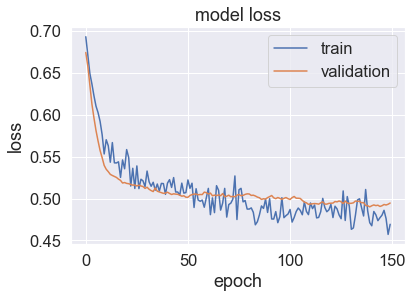

In [154]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [92]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers
# Multiples of 4, Smaller decrements, Hidden is 2/3 of Input

# define the keras model
model = Sequential()

model.add(Dense(24, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.3))
model.add(Dense(10, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.3))
model.add(Dense(6, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/150
42/42 [==============================] - 1s 5ms/step - loss: 0.6913 - accuracy: 0.5365 - val_loss: 0.6846 - val_accuracy: 0.6591
Epoch 2/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.5912 - val_loss: 0.6600 - val_accuracy: 0.6818
Epoch 3/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.6337 - val_loss: 0.6272 - val_accuracy: 0.7000
Epoch 4/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.6824 - val_loss: 0.5977 - val_accuracy: 0.7136
Epoch 5/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.6687 - val_loss: 0.5822 - val_accuracy: 0.7045
Epoch 6/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6015 - accuracy: 0.7112 - val_loss: 0.5726 - val_accuracy: 0.7045
Epoch 7/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5767 - accuracy: 0.7112 - val_loss: 0.5588 - val_accuracy: 0.6955
Epoch 8/150
4

Epoch 59/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.7568 - val_loss: 0.4923 - val_accuracy: 0.7455
Epoch 60/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.7766 - val_loss: 0.4925 - val_accuracy: 0.7455
Epoch 61/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.7675 - val_loss: 0.4929 - val_accuracy: 0.7545
Epoch 62/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.7766 - val_loss: 0.4930 - val_accuracy: 0.7409
Epoch 63/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5148 - accuracy: 0.7690 - val_loss: 0.4931 - val_accuracy: 0.7318
Epoch 64/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7888 - val_loss: 0.4922 - val_accuracy: 0.7409
Epoch 65/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7675 - val_loss: 0.4933 - val_accuracy: 0.7409
Epoch 

In [93]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 980us/step - loss: 0.4238 - accuracy: 0.8055
Training Accuracy: 80.55
7/7 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.7227
Validation Accuracy: 72.27


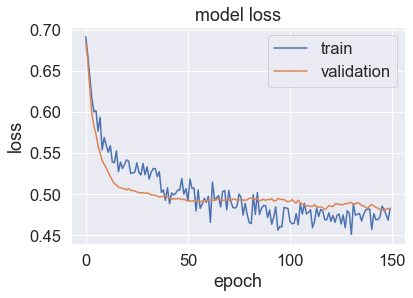

In [94]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [173]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers, #Increase Dropout and BatchNomarlisation layers
# Powers of 2, Larger decrements (256)
# define the keras model
model = Sequential()

model.add(Dense(256, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()


Epoch 1/150
42/42 [==============================] - 2s 9ms/step - loss: 0.6505 - accuracy: 0.6733 - val_loss: 0.6251 - val_accuracy: 0.6864
Epoch 2/150
42/42 [==============================] - 0s 4ms/step - loss: 0.5795 - accuracy: 0.7112 - val_loss: 0.6068 - val_accuracy: 0.7045
Epoch 3/150
42/42 [==============================] - 0s 3ms/step - loss: 0.5331 - accuracy: 0.7538 - val_loss: 0.5950 - val_accuracy: 0.6955
Epoch 4/150
42/42 [==============================] - 0s 3ms/step - loss: 0.5201 - accuracy: 0.7492 - val_loss: 0.5776 - val_accuracy: 0.7227
Epoch 5/150
42/42 [==============================] - 0s 3ms/step - loss: 0.5643 - accuracy: 0.7219 - val_loss: 0.5630 - val_accuracy: 0.7318
Epoch 6/150
42/42 [==============================] - 0s 4ms/step - loss: 0.5306 - accuracy: 0.7447 - val_loss: 0.5520 - val_accuracy: 0.7273
Epoch 7/150
42/42 [==============================] - 0s 4ms/step - loss: 0.5333 - accuracy: 0.7432 - val_loss: 0.5355 - val_accuracy: 0.7273
Epoch 8/150
4

Epoch 59/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4736 - accuracy: 0.8055 - val_loss: 0.4639 - val_accuracy: 0.7591
Epoch 60/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4487 - accuracy: 0.8146 - val_loss: 0.4619 - val_accuracy: 0.7545
Epoch 61/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4762 - accuracy: 0.8085 - val_loss: 0.4752 - val_accuracy: 0.7545
Epoch 62/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4757 - accuracy: 0.7933 - val_loss: 0.4600 - val_accuracy: 0.7682
Epoch 63/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4632 - accuracy: 0.7979 - val_loss: 0.4585 - val_accuracy: 0.7727
Epoch 64/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4656 - accuracy: 0.7918 - val_loss: 0.4604 - val_accuracy: 0.7773
Epoch 65/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4601 - accuracy: 0.8024 - val_loss: 0.4646 - val_accuracy: 0.7682
Epoch 

42/42 [==============================] - 0s 3ms/step - loss: 0.4314 - accuracy: 0.8024 - val_loss: 0.4441 - val_accuracy: 0.7773
Epoch 117/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4570 - accuracy: 0.7964 - val_loss: 0.4495 - val_accuracy: 0.7545
Epoch 118/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4518 - accuracy: 0.7888 - val_loss: 0.4441 - val_accuracy: 0.7591
Epoch 119/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4462 - accuracy: 0.7903 - val_loss: 0.4482 - val_accuracy: 0.7636
Epoch 120/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4474 - accuracy: 0.8085 - val_loss: 0.4448 - val_accuracy: 0.7727
Epoch 121/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.8191 - val_loss: 0.4563 - val_accuracy: 0.7591
Epoch 122/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4381 - accuracy: 0.8085 - val_loss: 0.4548 - val_accuracy: 0.7591
Epoch 123/150

In [174]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 1ms/step - loss: 0.3449 - accuracy: 0.8587
Training Accuracy: 85.87
7/7 [==============================] - 0s 1ms/step - loss: 0.4376 - accuracy: 0.7909
Validation Accuracy: 79.09


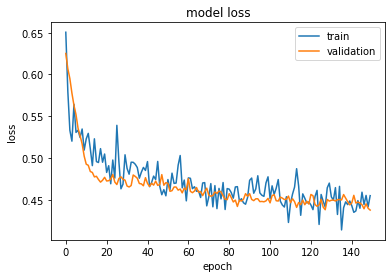

In [175]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [185]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers, #Increase Dropout and BatchNomarlisation layers
# Powers of 2, Larger decrements (256, 16 last layer)
# define the keras model
model = Sequential()

model.add(Dense(256, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()


Epoch 1/150
42/42 [==============================] - 2s 9ms/step - loss: 0.7461 - accuracy: 0.6641 - val_loss: 0.6218 - val_accuracy: 0.6909
Epoch 2/150
42/42 [==============================] - 0s 3ms/step - loss: 0.6114 - accuracy: 0.7036 - val_loss: 0.6054 - val_accuracy: 0.6636
Epoch 3/150
42/42 [==============================] - 0s 4ms/step - loss: 0.5647 - accuracy: 0.7508 - val_loss: 0.5725 - val_accuracy: 0.6909
Epoch 4/150
42/42 [==============================] - 0s 4ms/step - loss: 0.6029 - accuracy: 0.7173 - val_loss: 0.5516 - val_accuracy: 0.7000
Epoch 5/150
42/42 [==============================] - 0s 4ms/step - loss: 0.5657 - accuracy: 0.7416 - val_loss: 0.5372 - val_accuracy: 0.7364
Epoch 6/150
42/42 [==============================] - 0s 3ms/step - loss: 0.5519 - accuracy: 0.7508 - val_loss: 0.5369 - val_accuracy: 0.7409
Epoch 7/150
42/42 [==============================] - 0s 3ms/step - loss: 0.5281 - accuracy: 0.7629 - val_loss: 0.5203 - val_accuracy: 0.7500
Epoch 8/150
4

Epoch 59/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4532 - accuracy: 0.7964 - val_loss: 0.4553 - val_accuracy: 0.7909
Epoch 60/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4537 - accuracy: 0.8024 - val_loss: 0.4567 - val_accuracy: 0.7636
Epoch 61/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4522 - accuracy: 0.8024 - val_loss: 0.4544 - val_accuracy: 0.7682
Epoch 62/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4509 - accuracy: 0.8024 - val_loss: 0.4556 - val_accuracy: 0.7636
Epoch 63/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4842 - accuracy: 0.7842 - val_loss: 0.4578 - val_accuracy: 0.7545
Epoch 64/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4566 - accuracy: 0.8116 - val_loss: 0.4485 - val_accuracy: 0.7773
Epoch 65/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8207 - val_loss: 0.4532 - val_accuracy: 0.7773
Epoch 

42/42 [==============================] - 0s 3ms/step - loss: 0.4209 - accuracy: 0.8207 - val_loss: 0.4425 - val_accuracy: 0.7818
Epoch 117/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4428 - accuracy: 0.8146 - val_loss: 0.4469 - val_accuracy: 0.7773
Epoch 118/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4416 - accuracy: 0.8207 - val_loss: 0.4420 - val_accuracy: 0.7864
Epoch 119/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4473 - accuracy: 0.8055 - val_loss: 0.4494 - val_accuracy: 0.7818
Epoch 120/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4291 - accuracy: 0.8131 - val_loss: 0.4405 - val_accuracy: 0.7682
Epoch 121/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4341 - accuracy: 0.8191 - val_loss: 0.4385 - val_accuracy: 0.7727
Epoch 122/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4119 - accuracy: 0.8146 - val_loss: 0.4492 - val_accuracy: 0.7636
Epoch 123/150

In [186]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 2ms/step - loss: 0.3449 - accuracy: 0.8556
Training Accuracy: 85.56
7/7 [==============================] - 0s 1ms/step - loss: 0.4401 - accuracy: 0.7727
Validation Accuracy: 77.27


In [187]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [164]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers, #Increase Dropout and BatchNomarlisation layers
# Powers of 2, Larger decrements (256), Neurons in Hidden layer = (2/3 of input +1)
# define the keras model
model = Sequential()

model.add(Dense(256, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(164, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()


Epoch 1/150
42/42 [==============================] - 2s 9ms/step - loss: 0.7247 - accuracy: 0.6231 - val_loss: 0.6482 - val_accuracy: 0.6409
Epoch 2/150
42/42 [==============================] - 0s 3ms/step - loss: 0.5935 - accuracy: 0.7234 - val_loss: 0.6356 - val_accuracy: 0.6318
Epoch 3/150
42/42 [==============================] - 0s 3ms/step - loss: 0.5191 - accuracy: 0.7416 - val_loss: 0.6204 - val_accuracy: 0.6455
Epoch 4/150
42/42 [==============================] - 0s 4ms/step - loss: 0.5446 - accuracy: 0.7325 - val_loss: 0.6027 - val_accuracy: 0.7000
Epoch 5/150
42/42 [==============================] - 0s 3ms/step - loss: 0.5534 - accuracy: 0.7325 - val_loss: 0.5878 - val_accuracy: 0.6864
Epoch 6/150
42/42 [==============================] - 0s 3ms/step - loss: 0.5335 - accuracy: 0.7204 - val_loss: 0.5729 - val_accuracy: 0.7227
Epoch 7/150
42/42 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.7416 - val_loss: 0.5542 - val_accuracy: 0.7409
Epoch 8/150
4

Epoch 59/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4748 - accuracy: 0.8040 - val_loss: 0.4602 - val_accuracy: 0.7727
Epoch 60/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4385 - accuracy: 0.8055 - val_loss: 0.4616 - val_accuracy: 0.7636
Epoch 61/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.8191 - val_loss: 0.4644 - val_accuracy: 0.7500
Epoch 62/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.7888 - val_loss: 0.4626 - val_accuracy: 0.7727
Epoch 63/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4642 - accuracy: 0.8024 - val_loss: 0.4649 - val_accuracy: 0.7636
Epoch 64/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.8131 - val_loss: 0.4584 - val_accuracy: 0.7545
Epoch 65/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.7903 - val_loss: 0.4645 - val_accuracy: 0.7682
Epoch 

42/42 [==============================] - 0s 3ms/step - loss: 0.4291 - accuracy: 0.8161 - val_loss: 0.4505 - val_accuracy: 0.7773
Epoch 117/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4707 - accuracy: 0.7903 - val_loss: 0.4441 - val_accuracy: 0.7773
Epoch 118/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4621 - accuracy: 0.7918 - val_loss: 0.4423 - val_accuracy: 0.7636
Epoch 119/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4468 - accuracy: 0.8009 - val_loss: 0.4477 - val_accuracy: 0.7591
Epoch 120/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4450 - accuracy: 0.8070 - val_loss: 0.4433 - val_accuracy: 0.7545
Epoch 121/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4327 - accuracy: 0.8313 - val_loss: 0.4440 - val_accuracy: 0.7591
Epoch 122/150
42/42 [==============================] - 0s 3ms/step - loss: 0.4325 - accuracy: 0.8024 - val_loss: 0.4545 - val_accuracy: 0.7591
Epoch 123/150

In [165]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8435
Training Accuracy: 84.35
7/7 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.7773
Validation Accuracy: 77.73


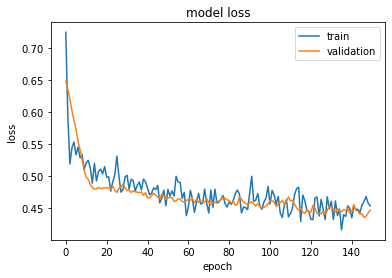

In [166]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [179]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers, #Increase Dropout and BatchNomarlisation layers
# Powers of 2, Larger decrements (512)
# define the keras model
model = Sequential()

model.add(Dense(512, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()


Epoch 1/150
42/42 [==============================] - 2s 11ms/step - loss: 0.6573 - accuracy: 0.6641 - val_loss: 0.6158 - val_accuracy: 0.7000
Epoch 2/150
42/42 [==============================] - 0s 6ms/step - loss: 0.5217 - accuracy: 0.7371 - val_loss: 0.6112 - val_accuracy: 0.7045
Epoch 3/150
42/42 [==============================] - 0s 6ms/step - loss: 0.5258 - accuracy: 0.7401 - val_loss: 0.6016 - val_accuracy: 0.7227
Epoch 4/150
42/42 [==============================] - 0s 6ms/step - loss: 0.5516 - accuracy: 0.7508 - val_loss: 0.5866 - val_accuracy: 0.7227
Epoch 5/150
42/42 [==============================] - 0s 6ms/step - loss: 0.5311 - accuracy: 0.7675 - val_loss: 0.5875 - val_accuracy: 0.7364
Epoch 6/150
42/42 [==============================] - 0s 6ms/step - loss: 0.5292 - accuracy: 0.7416 - val_loss: 0.5715 - val_accuracy: 0.7409
Epoch 7/150
42/42 [==============================] - 0s 6ms/step - loss: 0.5335 - accuracy: 0.7538 - val_loss: 0.5487 - val_accuracy: 0.7364
Epoch 8/150


Epoch 59/150
42/42 [==============================] - 0s 6ms/step - loss: 0.4370 - accuracy: 0.8176 - val_loss: 0.4444 - val_accuracy: 0.7682
Epoch 60/150
42/42 [==============================] - 0s 5ms/step - loss: 0.4284 - accuracy: 0.8131 - val_loss: 0.4507 - val_accuracy: 0.7682
Epoch 61/150
42/42 [==============================] - 0s 6ms/step - loss: 0.4484 - accuracy: 0.8176 - val_loss: 0.4433 - val_accuracy: 0.7636
Epoch 62/150
42/42 [==============================] - 0s 6ms/step - loss: 0.4470 - accuracy: 0.8146 - val_loss: 0.4415 - val_accuracy: 0.7682
Epoch 63/150
42/42 [==============================] - 0s 5ms/step - loss: 0.4436 - accuracy: 0.8009 - val_loss: 0.4365 - val_accuracy: 0.7818
Epoch 64/150
42/42 [==============================] - 0s 6ms/step - loss: 0.4532 - accuracy: 0.8070 - val_loss: 0.4367 - val_accuracy: 0.7727
Epoch 65/150
42/42 [==============================] - 0s 6ms/step - loss: 0.4294 - accuracy: 0.8176 - val_loss: 0.4490 - val_accuracy: 0.7727
Epoch 

42/42 [==============================] - 0s 6ms/step - loss: 0.4064 - accuracy: 0.8161 - val_loss: 0.4353 - val_accuracy: 0.7682
Epoch 117/150
42/42 [==============================] - 0s 6ms/step - loss: 0.4274 - accuracy: 0.8191 - val_loss: 0.4335 - val_accuracy: 0.8091
Epoch 118/150
42/42 [==============================] - 0s 5ms/step - loss: 0.4448 - accuracy: 0.7948 - val_loss: 0.4449 - val_accuracy: 0.7909
Epoch 119/150
42/42 [==============================] - 0s 6ms/step - loss: 0.4248 - accuracy: 0.8085 - val_loss: 0.4449 - val_accuracy: 0.7818
Epoch 120/150
42/42 [==============================] - 0s 5ms/step - loss: 0.4202 - accuracy: 0.8343 - val_loss: 0.4338 - val_accuracy: 0.8000
Epoch 121/150
42/42 [==============================] - 0s 6ms/step - loss: 0.4072 - accuracy: 0.8237 - val_loss: 0.4581 - val_accuracy: 0.7727
Epoch 122/150
42/42 [==============================] - 0s 5ms/step - loss: 0.4279 - accuracy: 0.8131 - val_loss: 0.4512 - val_accuracy: 0.7591
Epoch 123/150

In [180]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.8723
Training Accuracy: 87.23
7/7 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.8000
Validation Accuracy: 80.00


In [181]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [182]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers, #Increase Dropout and BatchNomarlisation layers
# Powers of 2, Larger decrements (512, 16 last layer)
# define the keras model
model = Sequential()

model.add(Dense(512, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()


Epoch 1/150
42/42 [==============================] - 2s 11ms/step - loss: 0.7008 - accuracy: 0.7006 - val_loss: 0.6182 - val_accuracy: 0.7182
Epoch 2/150
42/42 [==============================] - 0s 6ms/step - loss: 0.5928 - accuracy: 0.7264 - val_loss: 0.6147 - val_accuracy: 0.6773
Epoch 3/150
42/42 [==============================] - 0s 6ms/step - loss: 0.5530 - accuracy: 0.7508 - val_loss: 0.6042 - val_accuracy: 0.7227
Epoch 4/150
42/42 [==============================] - 0s 6ms/step - loss: 0.5411 - accuracy: 0.7432 - val_loss: 0.5924 - val_accuracy: 0.6955
Epoch 5/150
42/42 [==============================] - 0s 7ms/step - loss: 0.5796 - accuracy: 0.7310 - val_loss: 0.5869 - val_accuracy: 0.7545
Epoch 6/150
42/42 [==============================] - 0s 6ms/step - loss: 0.5281 - accuracy: 0.7629 - val_loss: 0.5758 - val_accuracy: 0.7409
Epoch 7/150
42/42 [==============================] - 0s 6ms/step - loss: 0.5345 - accuracy: 0.7477 - val_loss: 0.5459 - val_accuracy: 0.7409
Epoch 8/150


Epoch 59/150
42/42 [==============================] - 0s 5ms/step - loss: 0.4356 - accuracy: 0.8116 - val_loss: 0.4560 - val_accuracy: 0.7773
Epoch 60/150
42/42 [==============================] - 0s 6ms/step - loss: 0.4486 - accuracy: 0.8116 - val_loss: 0.4594 - val_accuracy: 0.7591
Epoch 61/150
42/42 [==============================] - 0s 6ms/step - loss: 0.4590 - accuracy: 0.7872 - val_loss: 0.4472 - val_accuracy: 0.7727
Epoch 62/150
42/42 [==============================] - 0s 6ms/step - loss: 0.4258 - accuracy: 0.8040 - val_loss: 0.4469 - val_accuracy: 0.7727
Epoch 63/150
42/42 [==============================] - 0s 7ms/step - loss: 0.4682 - accuracy: 0.7948 - val_loss: 0.4581 - val_accuracy: 0.7455
Epoch 64/150
42/42 [==============================] - 0s 6ms/step - loss: 0.4617 - accuracy: 0.7918 - val_loss: 0.4485 - val_accuracy: 0.7545
Epoch 65/150
42/42 [==============================] - 0s 6ms/step - loss: 0.4273 - accuracy: 0.8328 - val_loss: 0.4556 - val_accuracy: 0.7773
Epoch 

42/42 [==============================] - 0s 6ms/step - loss: 0.3969 - accuracy: 0.8359 - val_loss: 0.4378 - val_accuracy: 0.7682
Epoch 117/150
42/42 [==============================] - 0s 5ms/step - loss: 0.4424 - accuracy: 0.8207 - val_loss: 0.4437 - val_accuracy: 0.7864
Epoch 118/150
42/42 [==============================] - 0s 7ms/step - loss: 0.4303 - accuracy: 0.8146 - val_loss: 0.4401 - val_accuracy: 0.7864
Epoch 119/150
42/42 [==============================] - 0s 6ms/step - loss: 0.4240 - accuracy: 0.8207 - val_loss: 0.4469 - val_accuracy: 0.7727
Epoch 120/150
42/42 [==============================] - 0s 6ms/step - loss: 0.4043 - accuracy: 0.8313 - val_loss: 0.4373 - val_accuracy: 0.7773
Epoch 121/150
42/42 [==============================] - 0s 6ms/step - loss: 0.4037 - accuracy: 0.8237 - val_loss: 0.4695 - val_accuracy: 0.7818
Epoch 122/150
42/42 [==============================] - 0s 7ms/step - loss: 0.4087 - accuracy: 0.8040 - val_loss: 0.4449 - val_accuracy: 0.7682
Epoch 123/150

In [183]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.8632
Training Accuracy: 86.32
7/7 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.7909
Validation Accuracy: 79.09


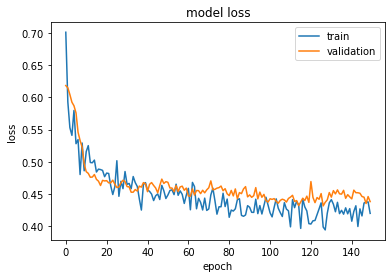

In [184]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [147]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers, #Increase Dropout and BatchNomarlisation layers
# Powers of 2, Larger decrements (512), Neurons in Hidden layer = (2/3 of input +1)
# define the keras model
model = Sequential()

model.add(Dense(512, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(334, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/150
42/42 [==============================] - 2s 10ms/step - loss: 0.7082 - accuracy: 0.6322 - val_loss: 0.6236 - val_accuracy: 0.6864
Epoch 2/150
42/42 [==============================] - 0s 4ms/step - loss: 0.5329 - accuracy: 0.7447 - val_loss: 0.6232 - val_accuracy: 0.6727
Epoch 3/150
42/42 [==============================] - 0s 5ms/step - loss: 0.5213 - accuracy: 0.7477 - val_loss: 0.6166 - val_accuracy: 0.6727
Epoch 4/150
42/42 [==============================] - 0s 4ms/step - loss: 0.5676 - accuracy: 0.7249 - val_loss: 0.6015 - val_accuracy: 0.6864
Epoch 5/150
42/42 [==============================] - 0s 4ms/step - loss: 0.5202 - accuracy: 0.7629 - val_loss: 0.5894 - val_accuracy: 0.6955
Epoch 6/150
42/42 [==============================] - 0s 4ms/step - loss: 0.5514 - accuracy: 0.7371 - val_loss: 0.5745 - val_accuracy: 0.7318
Epoch 7/150
42/42 [==============================] - 0s 4ms/step - loss: 0.5371 - accuracy: 0.7568 - val_loss: 0.5556 - val_accuracy: 0.7318
Epoch 8/150


Epoch 59/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4559 - accuracy: 0.7948 - val_loss: 0.4501 - val_accuracy: 0.7636
Epoch 60/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4232 - accuracy: 0.8176 - val_loss: 0.4493 - val_accuracy: 0.7545
Epoch 61/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.7918 - val_loss: 0.4386 - val_accuracy: 0.7773
Epoch 62/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4530 - accuracy: 0.7948 - val_loss: 0.4436 - val_accuracy: 0.7500
Epoch 63/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4510 - accuracy: 0.8176 - val_loss: 0.4357 - val_accuracy: 0.7909
Epoch 64/150
42/42 [==============================] - 0s 5ms/step - loss: 0.4565 - accuracy: 0.8131 - val_loss: 0.4390 - val_accuracy: 0.7864
Epoch 65/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4289 - accuracy: 0.8100 - val_loss: 0.4478 - val_accuracy: 0.7682
Epoch 

42/42 [==============================] - 0s 4ms/step - loss: 0.4027 - accuracy: 0.8283 - val_loss: 0.4429 - val_accuracy: 0.7773
Epoch 117/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4448 - accuracy: 0.7888 - val_loss: 0.4489 - val_accuracy: 0.7682
Epoch 118/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4505 - accuracy: 0.8070 - val_loss: 0.4533 - val_accuracy: 0.7727
Epoch 119/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4224 - accuracy: 0.8131 - val_loss: 0.4505 - val_accuracy: 0.7682
Epoch 120/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4120 - accuracy: 0.8283 - val_loss: 0.4415 - val_accuracy: 0.8000
Epoch 121/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4175 - accuracy: 0.8085 - val_loss: 0.4759 - val_accuracy: 0.7682
Epoch 122/150
42/42 [==============================] - 0s 4ms/step - loss: 0.4135 - accuracy: 0.8313 - val_loss: 0.4359 - val_accuracy: 0.7727
Epoch 123/150

In [148]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 2ms/step - loss: 0.3218 - accuracy: 0.8723
Training Accuracy: 87.23
7/7 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.7864
Validation Accuracy: 78.64


In [149]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [55]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers, #Increase Dropout and BatchNomarlisation layers
# Powers of 2, Larger decrements (1024)
# define the keras model
model = Sequential()

model.add(Dense(1024, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/150
42/42 [==============================] - 2s 18ms/step - loss: 0.6513 - accuracy: 0.6748 - val_loss: 0.6137 - val_accuracy: 0.6773
Epoch 2/150
42/42 [==============================] - 1s 12ms/step - loss: 0.5119 - accuracy: 0.7462 - val_loss: 0.6177 - val_accuracy: 0.6818
Epoch 3/150
42/42 [==============================] - 1s 12ms/step - loss: 0.5157 - accuracy: 0.7584 - val_loss: 0.6097 - val_accuracy: 0.7091
Epoch 4/150
42/42 [==============================] - 1s 12ms/step - loss: 0.5387 - accuracy: 0.7477 - val_loss: 0.6010 - val_accuracy: 0.6773
Epoch 5/150
42/42 [==============================] - 1s 14ms/step - loss: 0.5371 - accuracy: 0.7660 - val_loss: 0.5933 - val_accuracy: 0.7091
Epoch 6/150
42/42 [==============================] - 1s 12ms/step - loss: 0.5052 - accuracy: 0.7720 - val_loss: 0.5815 - val_accuracy: 0.7727
Epoch 7/150
42/42 [==============================] - 1s 14ms/step - loss: 0.4966 - accuracy: 0.7736 - val_loss: 0.5534 - val_accuracy: 0.7182
Epoch 

42/42 [==============================] - 1s 12ms/step - loss: 0.4430 - accuracy: 0.8085 - val_loss: 0.4464 - val_accuracy: 0.7727
Epoch 59/150
42/42 [==============================] - 1s 13ms/step - loss: 0.4259 - accuracy: 0.8161 - val_loss: 0.4420 - val_accuracy: 0.7682
Epoch 60/150
42/42 [==============================] - 1s 12ms/step - loss: 0.4177 - accuracy: 0.8267 - val_loss: 0.4417 - val_accuracy: 0.7727
Epoch 61/150
42/42 [==============================] - 1s 13ms/step - loss: 0.4368 - accuracy: 0.8237 - val_loss: 0.4255 - val_accuracy: 0.8091
Epoch 62/150
42/42 [==============================] - 1s 12ms/step - loss: 0.4342 - accuracy: 0.8085 - val_loss: 0.4410 - val_accuracy: 0.7727
Epoch 63/150
42/42 [==============================] - 1s 12ms/step - loss: 0.4385 - accuracy: 0.8146 - val_loss: 0.4396 - val_accuracy: 0.7773
Epoch 64/150
42/42 [==============================] - 1s 12ms/step - loss: 0.4401 - accuracy: 0.8146 - val_loss: 0.4380 - val_accuracy: 0.8091
Epoch 65/150

42/42 [==============================] - 1s 14ms/step - loss: 0.4343 - accuracy: 0.8207 - val_loss: 0.4439 - val_accuracy: 0.7909
Epoch 116/150
42/42 [==============================] - 1s 14ms/step - loss: 0.4099 - accuracy: 0.8237 - val_loss: 0.4423 - val_accuracy: 0.7682
Epoch 117/150
42/42 [==============================] - 1s 13ms/step - loss: 0.4416 - accuracy: 0.7994 - val_loss: 0.4434 - val_accuracy: 0.7773
Epoch 118/150
42/42 [==============================] - 1s 13ms/step - loss: 0.4325 - accuracy: 0.8161 - val_loss: 0.4417 - val_accuracy: 0.7773
Epoch 119/150
42/42 [==============================] - 1s 14ms/step - loss: 0.4256 - accuracy: 0.8055 - val_loss: 0.4538 - val_accuracy: 0.7727
Epoch 120/150
42/42 [==============================] - 1s 15ms/step - loss: 0.4054 - accuracy: 0.8283 - val_loss: 0.4393 - val_accuracy: 0.8000
Epoch 121/150
42/42 [==============================] - 1s 14ms/step - loss: 0.4178 - accuracy: 0.8176 - val_loss: 0.4622 - val_accuracy: 0.7591
Epoch 

In [56]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 4ms/step - loss: 0.3358 - accuracy: 0.8663
Training Accuracy: 86.63
7/7 [==============================] - 0s 4ms/step - loss: 0.4488 - accuracy: 0.7773
Validation Accuracy: 77.73


In [57]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [132]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers, #Increase Dropout and BatchNomarlisation layers
# Powers of 2, Larger decrements (1024), Neurons in Hidden layer = (2/3 of input +1)
# define the keras model
model = Sequential()

model.add(Dense(1024, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(676, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/150
42/42 [==============================] - 3s 17ms/step - loss: 0.6617 - accuracy: 0.6687 - val_loss: 0.6271 - val_accuracy: 0.7136
Epoch 2/150
42/42 [==============================] - 0s 10ms/step - loss: 0.5181 - accuracy: 0.7477 - val_loss: 0.6197 - val_accuracy: 0.6818
Epoch 3/150
42/42 [==============================] - 0s 10ms/step - loss: 0.5117 - accuracy: 0.7705 - val_loss: 0.6070 - val_accuracy: 0.7227
Epoch 4/150
42/42 [==============================] - 0s 10ms/step - loss: 0.5475 - accuracy: 0.7477 - val_loss: 0.5885 - val_accuracy: 0.7318
Epoch 5/150
42/42 [==============================] - 0s 10ms/step - loss: 0.5306 - accuracy: 0.7584 - val_loss: 0.5838 - val_accuracy: 0.7364
Epoch 6/150
42/42 [==============================] - 0s 10ms/step - loss: 0.5374 - accuracy: 0.7538 - val_loss: 0.5719 - val_accuracy: 0.7545
Epoch 7/150
42/42 [==============================] - 0s 10ms/step - loss: 0.5295 - accuracy: 0.7675 - val_loss: 0.5606 - val_accuracy: 0.7591
Epoch 

42/42 [==============================] - 0s 10ms/step - loss: 0.4530 - accuracy: 0.8055 - val_loss: 0.4444 - val_accuracy: 0.7818
Epoch 59/150
42/42 [==============================] - 0s 10ms/step - loss: 0.4256 - accuracy: 0.8131 - val_loss: 0.4407 - val_accuracy: 0.7818
Epoch 60/150
42/42 [==============================] - 0s 9ms/step - loss: 0.4341 - accuracy: 0.8222 - val_loss: 0.4457 - val_accuracy: 0.7727
Epoch 61/150
42/42 [==============================] - 0s 10ms/step - loss: 0.4369 - accuracy: 0.8237 - val_loss: 0.4403 - val_accuracy: 0.7773
Epoch 62/150
42/42 [==============================] - 0s 11ms/step - loss: 0.4352 - accuracy: 0.7964 - val_loss: 0.4398 - val_accuracy: 0.7818
Epoch 63/150
42/42 [==============================] - 0s 10ms/step - loss: 0.4480 - accuracy: 0.8207 - val_loss: 0.4365 - val_accuracy: 0.7773
Epoch 64/150
42/42 [==============================] - 0s 10ms/step - loss: 0.4480 - accuracy: 0.8100 - val_loss: 0.4333 - val_accuracy: 0.7818
Epoch 65/150


42/42 [==============================] - 1s 12ms/step - loss: 0.4461 - accuracy: 0.8146 - val_loss: 0.4328 - val_accuracy: 0.8136
Epoch 116/150
42/42 [==============================] - 0s 12ms/step - loss: 0.4030 - accuracy: 0.8267 - val_loss: 0.4391 - val_accuracy: 0.7773
Epoch 117/150
42/42 [==============================] - 1s 12ms/step - loss: 0.4433 - accuracy: 0.7948 - val_loss: 0.4394 - val_accuracy: 0.7727
Epoch 118/150
42/42 [==============================] - 0s 11ms/step - loss: 0.4322 - accuracy: 0.8085 - val_loss: 0.4294 - val_accuracy: 0.7818
Epoch 119/150
42/42 [==============================] - 1s 13ms/step - loss: 0.4301 - accuracy: 0.8040 - val_loss: 0.4388 - val_accuracy: 0.7955
Epoch 120/150
42/42 [==============================] - 0s 11ms/step - loss: 0.4147 - accuracy: 0.8040 - val_loss: 0.4289 - val_accuracy: 0.8000
Epoch 121/150
42/42 [==============================] - 1s 12ms/step - loss: 0.4310 - accuracy: 0.8100 - val_loss: 0.4634 - val_accuracy: 0.7773
Epoch 

In [133]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 6ms/step - loss: 0.3161 - accuracy: 0.8723
Training Accuracy: 87.23
7/7 [==============================] - 0s 5ms/step - loss: 0.4290 - accuracy: 0.8091
Validation Accuracy: 80.91


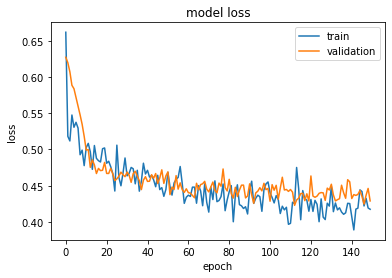

In [134]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()